In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('df_salary.csv')

In [3]:
df.head()

,First_Name,Middle_Name,Last_name,Department,Job_Title,Rate,Location,Hourly_Salary,Gender_Guess
0,Carmen,Casanova,Abbott,SHP/Physical Therapy,"PROF, CLINCL",69287.0,COLUM/HOSPT/UMSYS,salary,female
1,Colleen,Marie,Abbott,Applied Soc Sci,SPECIALIST,51000.0,COLUM/HOSPT/UMSYS,salary,female
2,Jeanne,Martha,Abbott,"JournalismPROF, A",SOC PROFL PRACTICE,68995.0,COLUM/HOSPT/UMSYS,salary,female
3,Kati,Marie,Abbott,EconomicsACADEMIC A,DVISOR,36700.0,COLUM/HOSPT/UMSYS,salary,female
4,Amr,Samy Mohamed,Abdelaziz,"RadiologyPROF, A",ST CLINCL DEPT,260000.0,COLUM/HOSPT/UMSYS,salary,male


- Null Hypothesis: Male salaries are less than or equal to female salaries
- Alternative Hypothesis: Male salaries are greater then female salaries

In [6]:
# get baseline difference 
males = df.loc[df['Gender_Guess'] == 'male', 'Rate']
females = df.loc[df['Gender_Guess'] == 'female', 'Rate']

baseline_difference = np.mean(males) - np.mean(females)
baseline_difference

15333.55077797515

In [38]:
from scipy.special import comb

In [39]:
comb(9951, 4989)

inf

In [12]:
sample_a = df.sample(n = len(males))
sample_b = df.drop(sample_a.index)

In [14]:
df.shape, sample_a.shape, sample_b.shape

((9951, 9), (4989, 9), (4962, 9))

In [16]:
sample_a['Rate'].mean() - sample_b['Rate'].mean()

-2177.7340033200016

In [30]:
%%time
differences = []
counter = 0
for i in range(1000000):
    if i % 10000 == 0:
        print(f'Completed {i} iterations')
    sample_a = df.sample(n = len(males))
    sample_b = df.drop(sample_a.index)
    sample_diff = sample_a['Rate'].mean() - sample_b['Rate'].mean()
    differences.append(sample_diff)
    if sample_diff > baseline_difference:
        counter += 1

Completed 0 iterations
Completed 10000 iterations
Completed 20000 iterations
Completed 30000 iterations
Completed 40000 iterations
Completed 50000 iterations
Completed 60000 iterations
Completed 70000 iterations
Completed 80000 iterations
Completed 90000 iterations
Completed 100000 iterations
Completed 110000 iterations
Completed 120000 iterations
Completed 130000 iterations
Completed 140000 iterations
Completed 150000 iterations
Completed 160000 iterations
Completed 170000 iterations
Completed 180000 iterations
Completed 190000 iterations
Completed 200000 iterations
Completed 210000 iterations
Completed 220000 iterations
Completed 230000 iterations
Completed 240000 iterations
Completed 250000 iterations
Completed 260000 iterations
Completed 270000 iterations
Completed 280000 iterations
Completed 290000 iterations
Completed 300000 iterations
Completed 310000 iterations
Completed 320000 iterations
Completed 330000 iterations
Completed 340000 iterations
Completed 350000 iterations
Comple

In [31]:
counter 

0

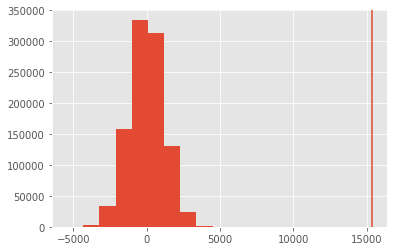

In [34]:
plt.hist(differences)
plt.axvline(baseline_difference)

In [37]:
%%time
differences = []
counter = 0
for i in range(10000):
    if i % 1000 == 0:
        print(f'Completed {i} iterations')
    sample_a = df.sample(n = len(males))
    sample_b = df.drop(sample_a.index)
    sample_diff = sample_a['Rate'].mean() - sample_b['Rate'].mean()
    differences.append(sample_diff)
    if sample_diff > 5000:
        counter += 1

Completed 0 iterations
Completed 1000 iterations
Completed 2000 iterations
Completed 3000 iterations
Completed 4000 iterations
Completed 5000 iterations
Completed 6000 iterations
Completed 7000 iterations
Completed 8000 iterations
Completed 9000 iterations
CPU times: user 26.5 s, sys: 150 ms, total: 26.7 s
Wall time: 26.7 s


Reject the null hypothesis and conclude that men on average get paid more then women 